In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_score,
)
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [4]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2, 11):
    gm = GaussianMixture(n_components=k)
    cluster_labels = gm.fit_predict(df)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))

Text(0.5, 1.0, 'Silhouette Analysis for Birch')

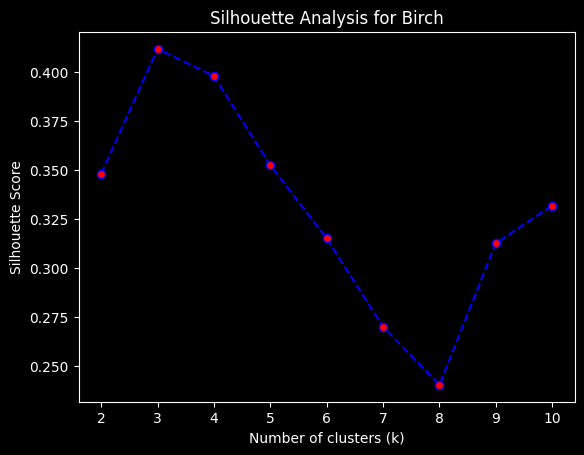

In [5]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Birch")
# plt.savefig("Images/Silhouette_Analysis.png", bbox_inches="tight")

Text(0.5, 1.0, 'Calinski Harabasz Analysis for Birch')

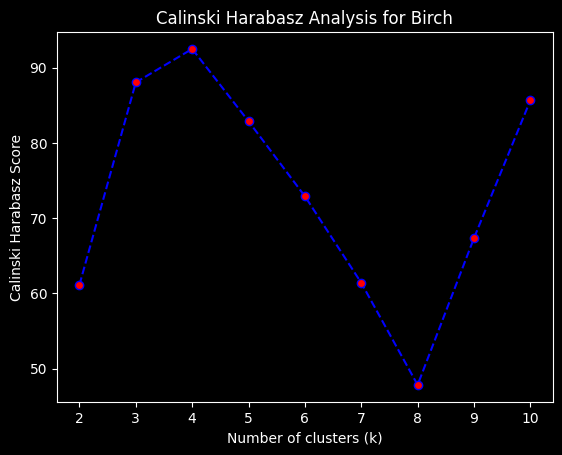

In [6]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for Birch")
# plt.savefig("Images/Calinski_Harabasz_Analysis.png", bbox_inches="tight")

Text(0.5, 1.0, 'Davies Bouldin Analysis for Birch')

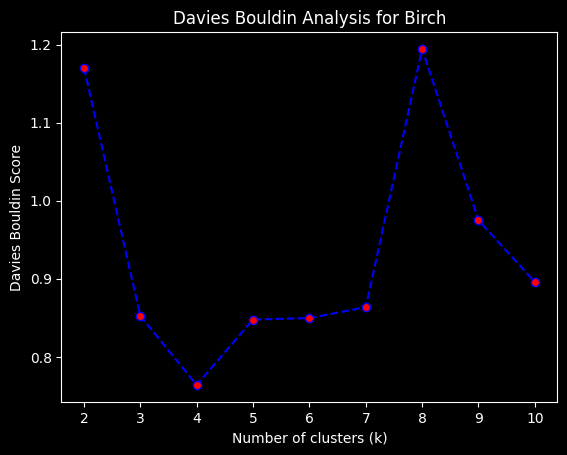

In [7]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for Birch")
# plt.savefig("Images/Davies_Bouldin_Analysis.png", bbox_inches="tight")